In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

2025-10-16 12:00:01.525125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760616001.805454      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760616001.869755      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#read the datasets
(train_data,train_label),(test_data,test_label)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_data.shape,train_label,test_data.shape,test_label

((60000, 28, 28),
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 (10000, 28, 28),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

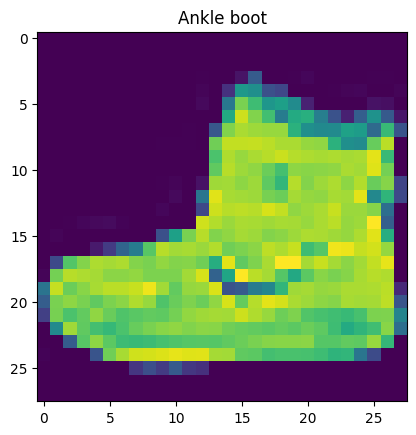

In [5]:
#plot a single image
import matplotlib.pyplot as plt
label_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.imshow(train_data[0])
plt.title(label_name[train_label[0]])
plt.show()

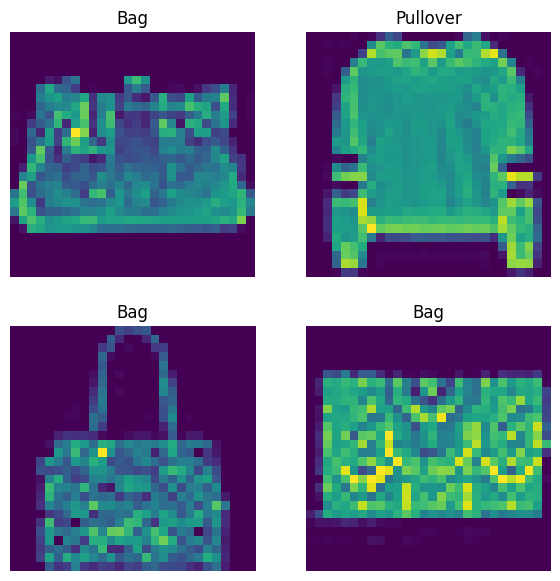

In [6]:
#plot randomly image
plt.figure(num=4,figsize=(7,7))
import random
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index])
    plt.title(label_name[train_label[rand_index]])
    plt.axis(False)
plt.show()
    

In [7]:
#building the model
tf.random.set_seed(24)
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

model=Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(10,activation=tf.keras.activations.softmax))

#compile the model
model.compile(loss='CategoricalCrossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
#fit the model
history=model.fit(train_data,tf.one_hot(train_label,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_label,depth=10)))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1760616017.831072      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760616017.831796      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/10


I0000 00:00:1760616020.899584      60 service.cc:148] XLA service 0x781f00006d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760616020.900568      60 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760616020.900590      60 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760616021.122368      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


  75/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1057 - loss: 8.6884 

I0000 00:00:1760616022.023139      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1336 - loss: 2.6397 - val_accuracy: 0.2146 - val_loss: 1.7728
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2485 - loss: 1.7526 - val_accuracy: 0.2735 - val_loss: 1.6808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2755 - loss: 1.6766 - val_accuracy: 0.2889 - val_loss: 1.6479
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2848 - loss: 1.6420 - val_accuracy: 0.3119 - val_loss: 1.6192
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2959 - loss: 1.6280 - val_accuracy: 0.3152 - val_loss: 1.6127
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3068 - loss: 1.6117 - val_accuracy: 0.3222 - val_loss: 1.5964
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3114 - loss: 1.6031 - val_accuracy: 0.3319 - val_loss: 1.5899
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3172 - loss: 1.5934 - val_accurac

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [9]:
#check the min and max value of training and test data
train_data.min(),train_data.max(),test_data.min(),test_data.max()

(0, 255, 0, 255)

In [10]:
#scaling the data
train_scaled_data=train_data/train_data.max()
test_scaled_data=test_data/test_data.max()


In [11]:
train_scaled_data.min(),train_scaled_data.max()

(0.0, 1.0)

In [12]:
#building the model
tf.random.set_seed(24)
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

model1=Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model1.add(Dense(4,activation='relu'))
model1.add(Dense(4,activation='relu'))
model1.add(Dense(10,activation=tf.keras.activations.softmax))

#compile the model
model1.compile(loss='CategoricalCrossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
#fit the model
history=model1.fit(train_scaled_data,tf.one_hot(train_label,depth=10),epochs=10,validation_data=(test_scaled_data,tf.one_hot(test_label,depth=10)))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3570 - loss: 1.7005 - val_accuracy: 0.6489 - val_loss: 0.9900
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6753 - loss: 0.9115 - val_accuracy: 0.7096 - val_loss: 0.8383
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7215 - loss: 0.7994 - val_accuracy: 0.7149 - val_loss: 0.8081
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7305 - loss: 0.7595 - val_accuracy: 0.7204 - val_loss: 0.7870
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7379 - loss: 0.7334 - val_accuracy: 0.7285 - val_loss: 0.7634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7428 - loss: 0.7149 - val_accuracy: 0.7345 - val_loss: 0.7508
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7459 - loss: 0.7019 - val_accuracy: 0.7396 - val_loss: 0.7348
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7498 - loss: 0.6920 - 

In [13]:
#visualization of data 
def visualization_data(history):
    plt.figure(num=2,figsize=(10,5))
    plt.subplot(121)
    plt.plot(history.history['accuracy'],color='red')
    plt.plot(history.history['val_accuracy'],color='green')
    plt.title('train accuracy vs test accuracy')
    plt.xlabel('no.of epochs')
    plt.ylabel('accuracy')
    plt.subplot(122)
    plt.plot(history.history['loss'],color='red')
    plt.plot(history.history['val_loss'],color='green')
    plt.title('train loss vs test loss')
    plt.xlabel('no. of epochs')
    plt.ylabel('loss')

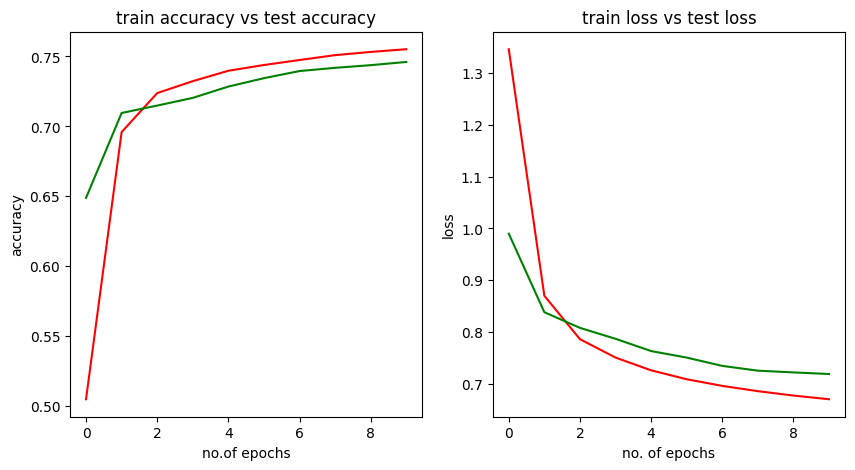

In [14]:
visualization_data(history)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
#finding the ideal learning rate
model2=Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(10,activation=tf.keras.activations.softmax))

#compile the model
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
#create the learning rate callbacks
lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:0.001*10**(epoch/20))
#create early stopping
early_stopping=EarlyStopping(monitor='accuracy',patience=5,restore_best_weights=True)
#fit the model
history2=model2.fit(train_scaled_data,tf.one_hot(train_label,depth=10),epochs=40,callbacks=[lr_schedular,early_stopping],validation_data=(test_scaled_data,tf.one_hot(test_label,depth=10)))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3601 - loss: 1.6679 - val_accuracy: 0.4984 - val_loss: 1.2452 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5330 - loss: 1.1772 - val_accuracy: 0.6744 - val_loss: 0.9494 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7038 - loss: 0.8639 - val_accuracy: 0.7601 - val_loss: 0.6798 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7831 - loss: 0.6376 - val_accuracy: 0.7969 - val_loss: 0.6095 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8042 - loss: 0.5743 - val_accuracy: 0.8023 - val_loss: 0.5787 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8119 - loss: 0.5472 - val_accuracy: 0.8077 - val_loss: 0.5610 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8160 - l

In [17]:
# #plot the learning rate decay curve
# lrs=0.001*10**(tf.range(22)/20)
# plt.semilogx(lrs,history2.history['loss'])
# plt.xlabel('learning rate')
# plt.ylabel('loss')
# plt.title('finding the learning rate')
# plt.legend()
# plt.show()


In [18]:
#evaluate the model
model2.evaluate(test_scaled_data,tf.one_hot(test_label,depth=10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8156 - loss: 0.5337


[0.5446045994758606, 0.8118000030517578]

In [19]:
#predict the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def metrics_calc(y_test,y_pred):
    y_test=np.argmax(y_test,axis=1) #filter maximum value from the array.
    y_pred=np.argmax(y_pred,axis=1)
    print('accuracy score is :',accuracy_score(y_test,y_pred))
   

In [20]:
y2_pred=model2.predict(test_scaled_data)
metrics_calc(tf.one_hot(test_label,depth=10),y2_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
accuracy score is : 0.8118


In [21]:
np.argmax(y2_pred,axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [22]:
pd.DataFrame(y2_pred).head(1) #maximum number found in 9

,0,1,2,3,4,5,6,7,8,9
0,0.000011,9.871110e-12,2.730926e-07,7.734435e-10,6.201164e-10,0.423841,0.000002,0.100502,0.002225,0.47342


In [23]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix for true vs predicted labels.
    Automatically converts one-hot labels and softmax predictions.

    Args:
        y_true: Ground truth labels (integer or one-hot encoded).
        y_pred: Model predictions (class probabilities or class labels).
    """

    # Convert one-hot or probability arrays to class indices
    if y_true.ndim > 1:
        y_true = np.argmax(y_true, axis=1)
    if y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
    n_classes = cm.shape[0]

    # Plot setup
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix", fontsize=18)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.colorbar()

    # Tick labels
    ticks = np.arange(n_classes)
    plt.xticks(ticks, ticks)
    plt.yticks(ticks, ticks)

    # Text annotations
    threshold = (cm.max() + cm.min()) / 2.0
    for i, j in itertools.product(range(n_classes), range(n_classes)):
        plt.text(
            j, i, f"{cm[i, j]}\n({cm_norm[i, j]*100:.1f}%)",
            ha="center",
            color="white" if cm[i, j] > threshold else "black",
            fontsize=10
        )

    plt.tight_layout()
    plt.show()


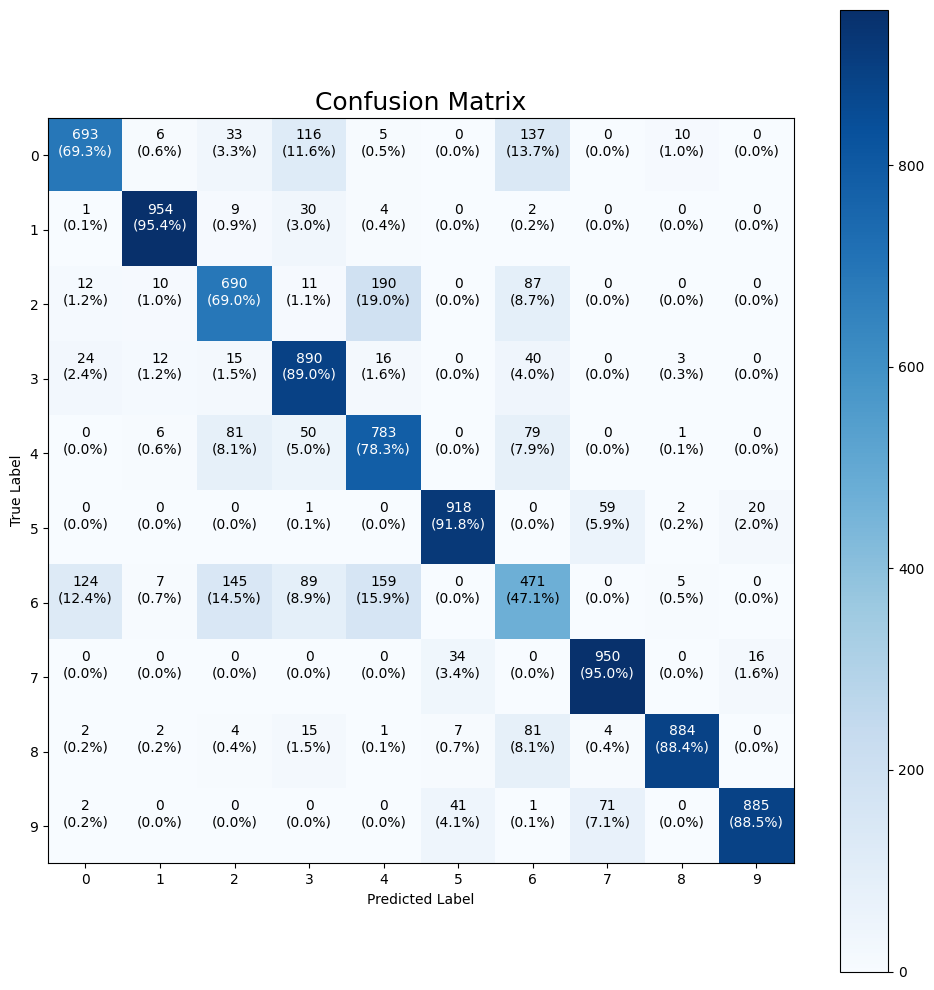

In [24]:
make_confusion_matrix(tf.one_hot(test_label,depth=10),y2_pred)